# [[4,2,2]] stabilizer code


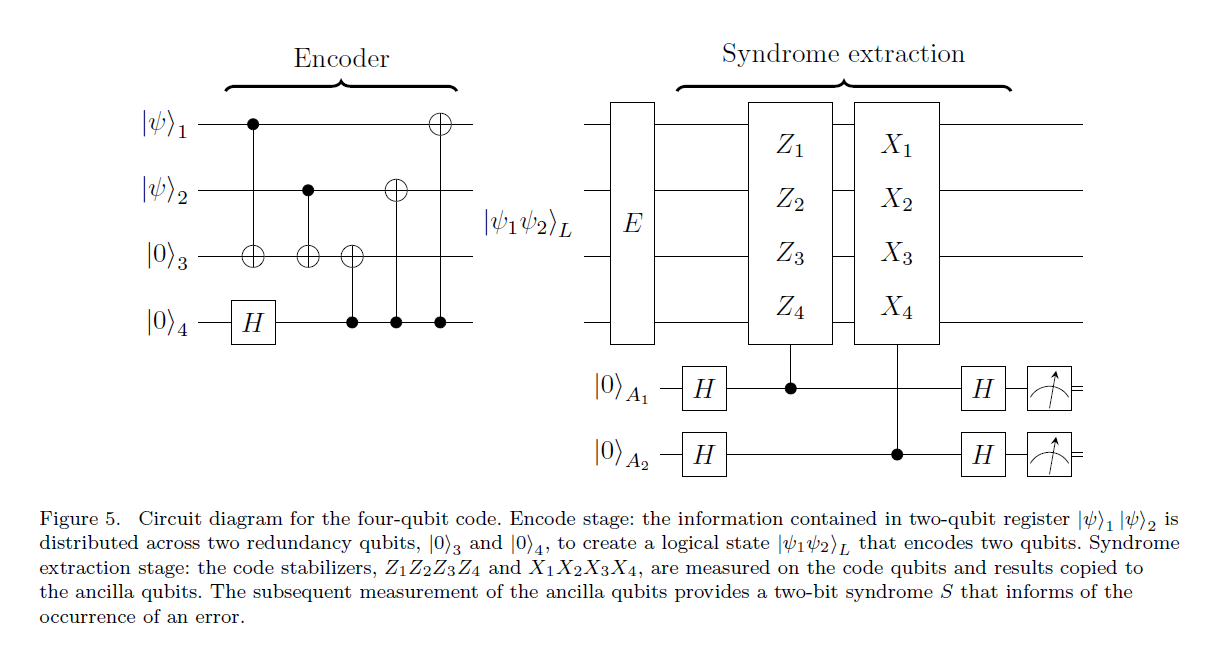


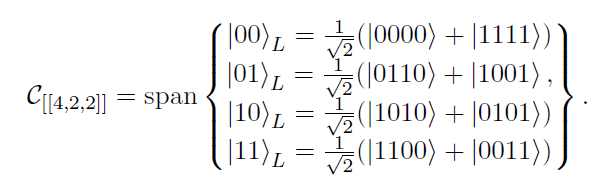

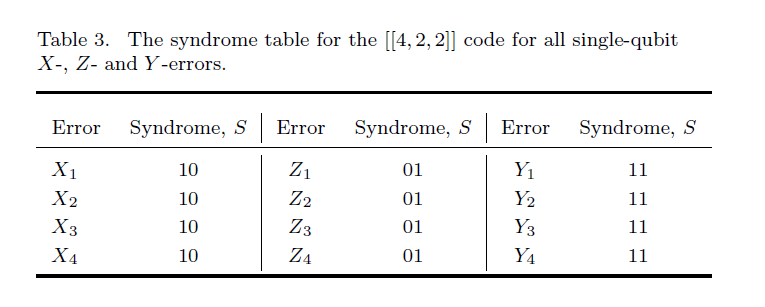

In [1]:
import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R

from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

In [10]:
syndr_z_qc = qiskit.QuantumCircuit(4)
syndr_z_qc.z(0)
syndr_z_qc.z(1)
syndr_z_qc.z(2)
syndr_z_qc.z(3)
syndr_gate_z = syndr_z_qc.to_gate(None,'Syndrome_z').control(1)

syndr_x_qc = qiskit.QuantumCircuit(4)
syndr_x_qc.x(0)
syndr_x_qc.x(1)
syndr_x_qc.x(2)
syndr_x_qc.x(3)
syndr_gate_x = syndr_x_qc.to_gate(None,'Syndrome_x').control(1)

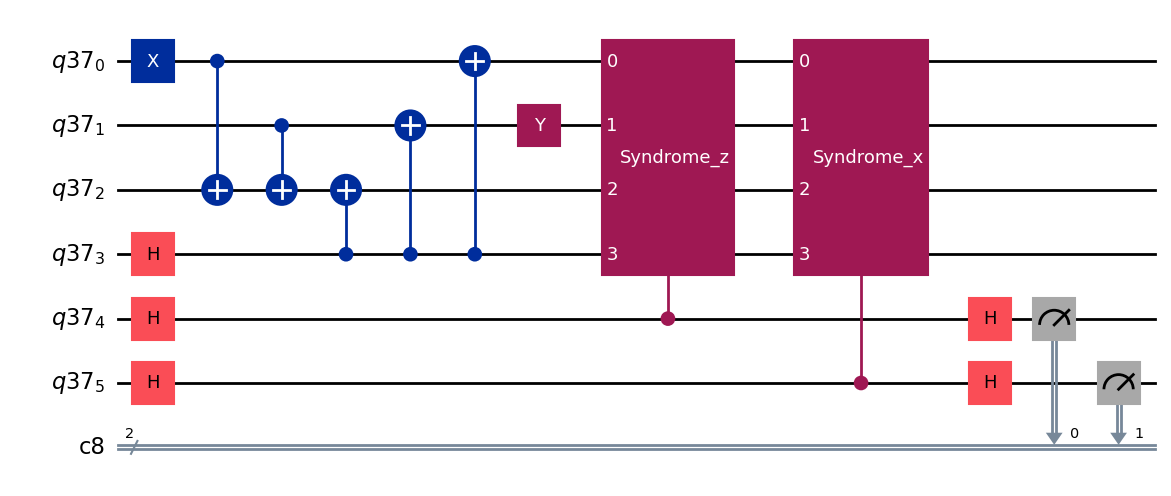

In [23]:
q_reg = Q_R(6)
cl_reg = C_R(2)

qc = qiskit.QuantumCircuit(q_reg, cl_reg)

#state preparation
qc.x(0)

#Encoder
qc.cx(0,2)
qc.cx(1,2)

qc.h(3)
qc.cx(3,2)
qc.cx(3,1)
qc.cx(3,0)

#Error
qc.y(1)
#qc.x(0)


#Syndrome extraction
qc.h(4)
qc.h(5)
qc.append(syndr_gate_z, [4, 0, 1, 2, 3])
qc.append(syndr_gate_x, [5, 0, 1, 2, 3])
qc.h(4)
qc.h(5)

qc.measure(4,0)
qc.measure(5,1)

qc.draw('mpl')

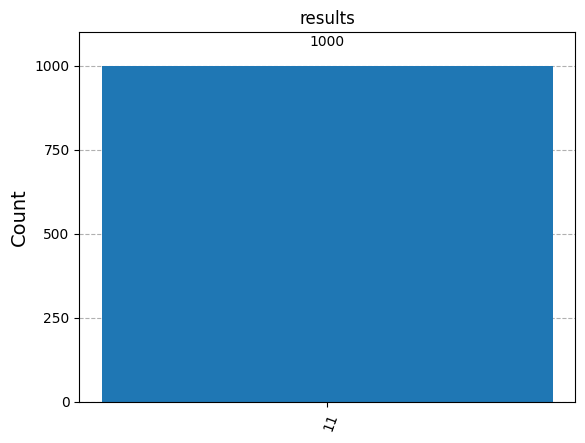

In [24]:
shot_num = 1000
simulator = AerSimulator()
qc_tr = transpile(qc, simulator)
result = simulator.run(qc_tr,shots = shot_num).result()
counts = result.get_counts(qc_tr)

from qiskit.visualization import plot_histogram
plot_histogram(counts, title = 'results')